Prediction Using Decision Tree Algorithm
================================================================

In [1]:
import pandas as pd
import numpy as np
Data=pd.read_csv("Downloads\Iris.csv")
Data=pd.DataFrame(Data)
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#converting the target variable from string to factor type
from sklearn.preprocessing import LabelEncoder
le_sp = LabelEncoder()
Data['sp_n'] = le_sp.fit_transform(Data['Species'])
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sp_n
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [3]:
Data=Data.drop('Species', axis=1)
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,sp_n
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [4]:
target=Data['sp_n']
Input=Data.drop('sp_n', axis='columns')

In [5]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: sp_n, Length: 150, dtype: int32

In [6]:
Input

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


<b> Splitting the dataset into Train and Test
  

In [8]:
from sklearn.model_selection import train_test_split
Input_train,Input_test,target_train,target_test=train_test_split(Input,target,test_size=0.2,random_state=0)

<b> Building the model

In [9]:
from sklearn import tree
DT_Model=tree.DecisionTreeClassifier()

In [10]:
Model=DT_Model.fit(Input_train,target_train)

In [11]:
Model

DecisionTreeClassifier()

In [12]:
Model.score(Input_train,target_train)

1.0

In [13]:
Model.score(Input_test,target_test)

0.9666666666666667

<b> Testing of a model <b>

In [14]:
target_pred=Model.predict(Input_test)

In [15]:
target_pred

array([2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

<b> Visualizing the Decision Tree

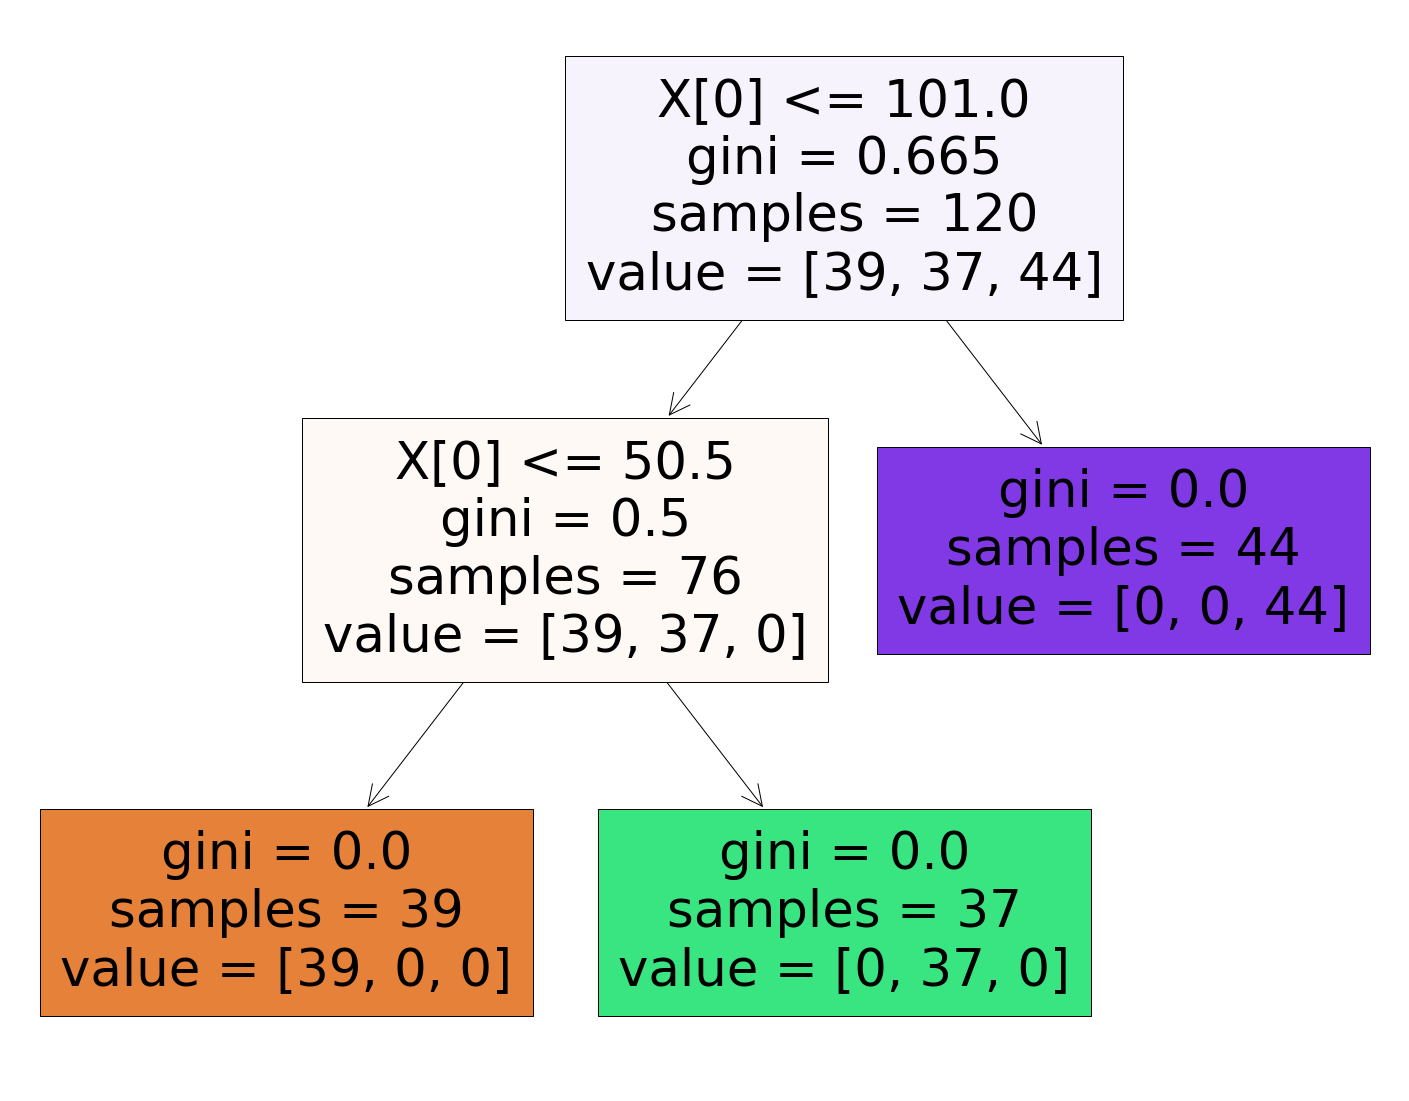

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Model, filled=True)

In [17]:
fig.savefig("decistion_tree.png")

In [18]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(target_test, target_pred)

In [19]:
matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

<b> Findings

<b> The score of the model is 0.9666666666666667 </b>
<b> The species of Setosa and Versicolor are being classified correctly by the model.</b>
<b> Only one record of species Verginica is being missclassified as Versicolor.</b>
